## Final Project : NoteBook
## Proposal :

**The Data 601 Final Project is an analysis of two (or more) data sets to address one or more hypotheses and one or more questions about the combined data.**

**DATA SOURCE:** https://umbc.box.com/s/uhqmqlq6lkmfpzzcv8gxsvhtkvek5qq1
## Solution :

**importing the necessary libraries**

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

**loading datasets**

In [2]:
# reading the 2 datasets
main_df = pd.read_excel('6481b945-7549-44e5-a65b-8b8eb8b92c87.xlsx', sheet_name = 'Sheet1')
df2 = pd.read_excel('39c00379-17c1-4120-96b7-fa372e26f8f0.xlsx', sheet_name = 'Sheet1')

## Merging two datasets to analyse the combined data

In [3]:
# combining the 2 datasets using left join i.e., including all Inspection IDs of the main_df
data = pd.merge(main_df, df2, how = 'left', on = ['Inspection ID', 'FEI Number', 'Legal Name', 'Inspection End Date'])

In [4]:
# exploring the top 5 rows of the dataset
data.head()

,FEI Number,Legal Name,City,State,Zip,Country/Area,Fiscal Year,Inspection ID,Posted Citations,Inspection End Date,Classification,Project Area,Product Type,FMD-145 Date,Program Area,Act/CFR Number,Short Description,Long Description
0,3017202975,PAVmed Inc.,Foxboro,Massachusetts,02035,United States,2022,1167299,Yes,2022-04-15,Voluntary Action Indicated (VAI),Compliance: Devices,Devices,-,Devices,21 CFR 820.100(b),Documentation,Corrective and preventive action activities an...
1,3017202975,PAVmed Inc.,Foxboro,Massachusetts,02035,United States,2022,1167299,Yes,2022-04-15,Voluntary Action Indicated (VAI),Compliance: Devices,Devices,-,Devices,21 CFR 820.198(a),Lack of or inadequate complaint procedures,"Procedures for receiving, reviewing, and evalu..."
2,3017202975,PAVmed Inc.,Foxboro,Massachusetts,02035,United States,2022,1167299,Yes,2022-04-15,No Action Indicated (NAI),Postmarket Assurance: Devices,Devices,-,Devices,21 CFR 820.100(b),Documentation,Corrective and preventive action activities an...
3,3017202975,PAVmed Inc.,Foxboro,Massachusetts,02035,United States,2022,1167299,Yes,2022-04-15,No Action Indicated (NAI),Postmarket Assurance: Devices,Devices,-,Devices,21 CFR 820.198(a),Lack of or inadequate complaint procedures,"Procedures for receiving, reviewing, and evalu..."
4,3000138835,Ten Ren Tea and Ginseng Co Inc,New York,New York,10013,United States,2022,1167517,No,2022-04-15,No Action Indicated (NAI),Foodborne Biological Hazards,Food/Cosmetics,-,NaN,NaN,NaN,NaN


In [5]:
# exploring the data-types of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 494304 entries, 0 to 494303
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   FEI Number           494304 non-null  int64         
 1   Legal Name           494304 non-null  object        
 2   City                 494304 non-null  object        
 3   State                494304 non-null  object        
 4   Zip                  494304 non-null  object        
 5   Country/Area         494304 non-null  object        
 6   Fiscal Year          494304 non-null  int64         
 7   Inspection ID        494304 non-null  int64         
 8   Posted Citations     494304 non-null  object        
 9   Inspection End Date  494304 non-null  datetime64[ns]
 10  Classification       494304 non-null  object        
 11  Project Area         494304 non-null  object        
 12  Product Type         494304 non-null  object        
 13  FMD-145 Date  

**Data Cleaning - Inspection of Missing Values & Treatment**

In [6]:
(data.isnull().sum(axis = 0)*100)/data.shape[0]

FEI Number              0.000000
Legal Name              0.000000
City                    0.000000
State                   0.000000
Zip                     0.000000
Country/Area            0.000000
Fiscal Year             0.000000
Inspection ID           0.000000
Posted Citations        0.000000
Inspection End Date     0.000000
Classification          0.000000
Project Area            0.000000
Product Type            0.000000
FMD-145 Date            0.000000
Program Area           36.669135
Act/CFR Number         36.709393
Short Description      36.669135
Long Description       36.669742
dtype: float64

**Dropping the columns with missing values as the threshold for missing values used in this analysis is 35%**

In [7]:
# dropping the columns with missing values
final_df = data.drop(['Program Area', 'Act/CFR Number', 'Short Description', 'Long Description'], axis = 1)

## Exploratory Data Analysis

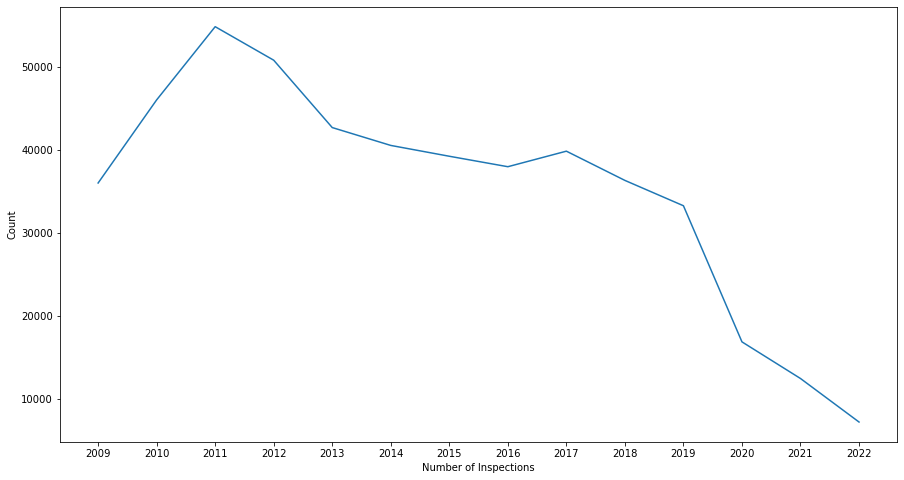

In [8]:
# number of inspections per year (from 2009-2022)

inspections_final_df = pd.DataFrame(final_df.groupby('Fiscal Year')['Inspection ID'].count()).reset_index()
inspections_final_df.rename({'Inspection ID' : 'Count'}, axis = 1, inplace = True)

plt.figure(figsize = (15, 8))
sns.lineplot(x = 'Fiscal Year', y = 'Count', data = inspections_final_df)
plt.xlabel('Number of Inspections')
plt.xticks([year for year in range(min(final_df['Fiscal Year']), max(final_df['Fiscal Year']) + 1)])
plt.show()

*In the year, 2011, there has been the maximum number of inspections*

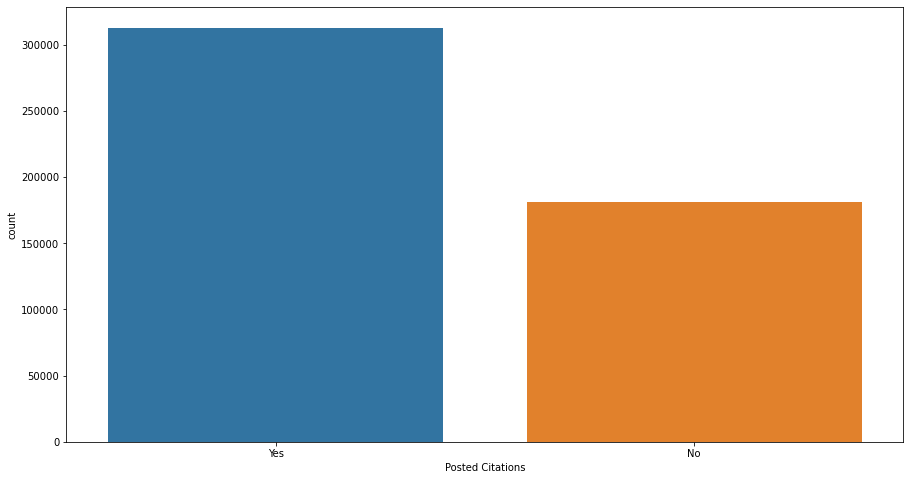

In [9]:
# count distribution of citations posted: 'Yes' or 'No'
plt.figure(figsize = (15, 8))
sns.countplot(x = 'Posted Citations', data = data)
plt.show()

*Most of the cases have citations being posted*

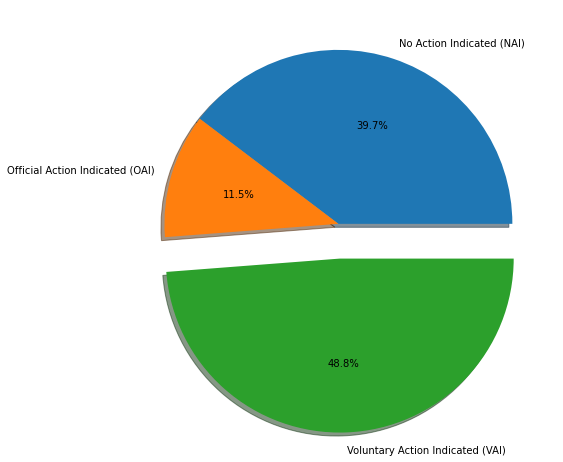

In [10]:
classification_df = pd.DataFrame(data.groupby('Classification')['Inspection ID'].count()).reset_index()
classification_df.rename({'Inspection ID' : 'Count'}, axis = 1, inplace = True)

plt.figure(figsize = (15, 8))
plt.pie(classification_df['Count'], labels = classification_df['Classification'], 
        autopct='%1.1f%%', explode = [0, 0, 0.2], shadow = True)
plt.show()

*Most of the cases are classified as Voluntary Action Indicated (VAI)*

## Questions:

 **Q1) Does the classification type being VAI affect the decision of citation being posted significantly?**

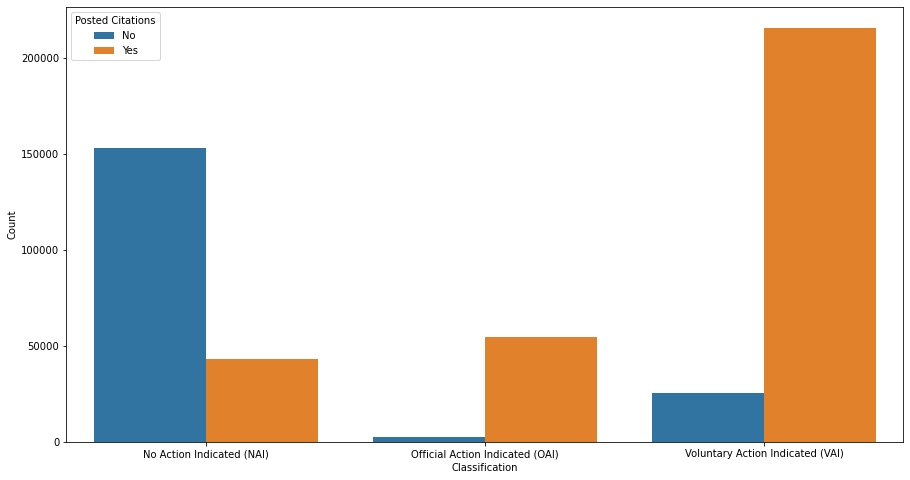

In [11]:
# relationship between classification type and whether citation being posted or not
citations_classfication = pd.DataFrame(data.groupby(['Classification', 'Posted Citations'])['Inspection ID'].count()).reset_index()
citations_classfication.rename({'Inspection ID' : 'Count'}, axis = 1, inplace = True)

plt.figure(figsize = (15, 8))
sns.barplot(x = 'Classification', y = 'Count', hue = 'Posted Citations', data = citations_classfication)
plt.show()

**Answer:**

*YES*

*For cases classified as No Action Indicated (NAI), majority of the cases have no citations posted*

*On the other hand, cases classified as Official Action Indicated (OAI) and Voluntary Action Indicated (VAI), majority of the cases have citations being posted*



**Q2) How does product type being Food/Cosmetics impact the citation posting?**

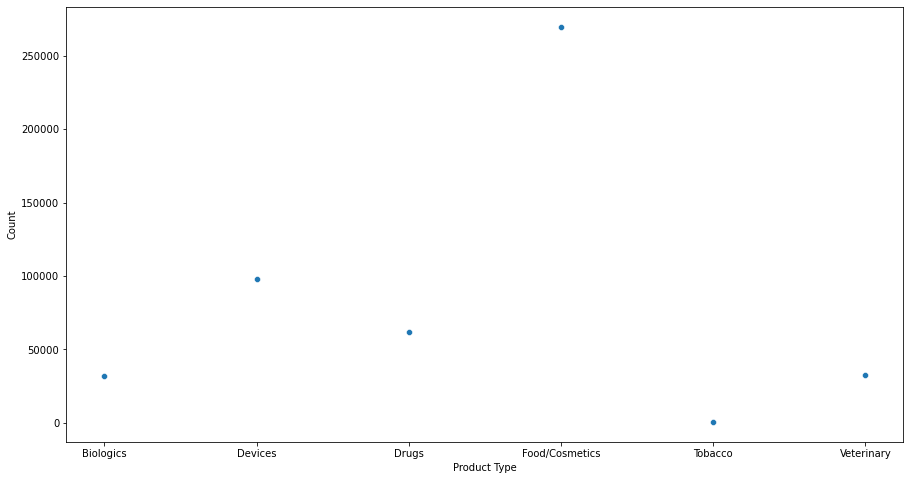

In [12]:
product_df = pd.DataFrame(data.groupby('Product Type')['Inspection ID'].count()).reset_index()
product_df.rename({'Inspection ID' : 'Count'}, axis = 1, inplace = True)

plt.figure(figsize = (15, 8))
sns.scatterplot(x = 'Product Type', y = 'Count', data = product_df)
plt.show()

**Answer:**

*YES*

*Most of the cases are based out of Food/Cosmetics based Products whereas very few cases involve Tobacco products*

**Q3) Does maximum products that are Devices being posted a citation?**

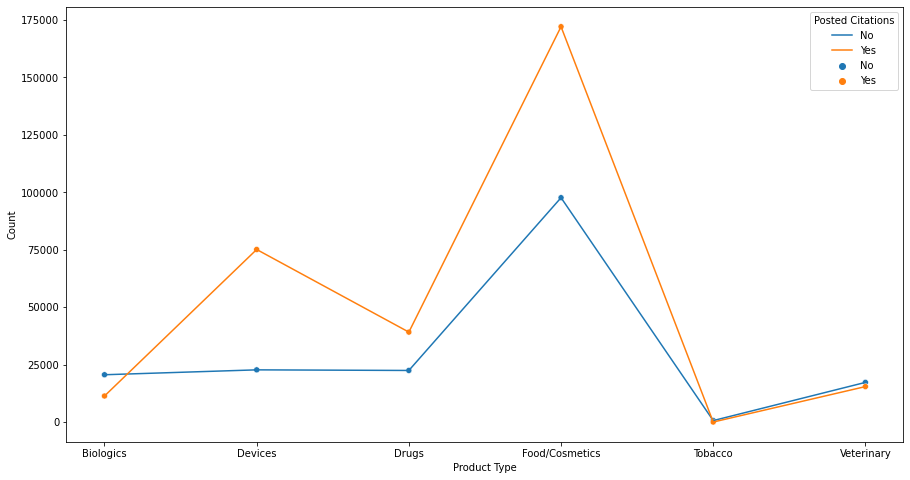

In [13]:
# relationship between product type and whether citation being posted or not
citations_producttype = pd.DataFrame(data.groupby(['Product Type', 'Posted Citations'])['Inspection ID'].count()).reset_index()
citations_producttype.rename({'Inspection ID' : 'Count'}, axis = 1, inplace = True)

plt.figure(figsize = (15, 8))
sns.lineplot(x = 'Product Type', y = 'Count', hue = 'Posted Citations', data = citations_producttype)
sns.scatterplot(x = 'Product Type', y = 'Count', hue = 'Posted Citations', data = citations_producttype)
plt.show()

**Answer:**

*NO*

Food/Cosmetics has the majority citations posted

1.   For Biologics based product, majority of the cases do not have citations being posted.
2.   For Devices, Drugs and Food/Cosmetics based product, majority of the cases have citations being posted.
3.   For Tobacco based products, almost equal number of cases have citations posted.
4.   For Veterinary based products, slightly higher number cases do not have citations being posted.



### Data Preprocessing

In [14]:
# selecting the 3 varibles: Classification, Product Type and Posted Citations
df_selected = data[['Classification', 'Product Type', 'Posted Citations']]

# creating dummy variables for categorical variables, Classification and Product Type
df_selected = pd.get_dummies(df_selected, columns=['Classification', 'Product Type'], drop_first=True)

# converting the target variable (Posted Citations) into numeric i.e., 'Yes' -> 1, 'No' -> 0
df_selected['Posted Citations'] = df_selected['Posted Citations'].map({'No': 0, 'Yes': 1})

## Hypothesis

### 1st Hypothesis

**Null Hypothesis**: *Citation Posting does NOT depend significantly on Classification being Voluntary Action Indicated (VAI)*

**Alternate Hypothesis**: *Citation Posting does depend significantly on Classification being Voluntary Action Indicated (VAI)*

*The Hypothesis Testing is done by applying z-test (with 5% Significance Level) on the Logistic Regression estimated feature coefficients for predicting whether Citations have been posted, given the Classification type being VAI*

In [15]:
# executing the logistic regression model
y_train = df_selected['Posted Citations']
X_train = df_selected['Classification_Voluntary Action Indicated (VAI)']

lr_model = sm.GLM(y_train, sm.add_constant(X_train), family = sm.families.Binomial()).fit()
print(lr_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:       Posted Citations   No. Observations:               494304
Model:                            GLM   Df Residuals:                   494302
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.5012e+05
Date:                Sun, 16 Oct 2022   Deviance:                   5.0024e+05
Time:                        10:29:13   Pearson chi2:                 4.94e+05
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------




The p-Value associated with the coefficient of the dummy variable, **Classification_Voluntary Action Indicated (VAI)** of Classification is 0, which is less than 0.05, hence, citation being posted or not SIGNIFICANTLY depends on the Classification type being VAI or not. (*Null Hypothesis rejected at 5% Significance*)



### 2nd Hypothesis

**Null Hypothesis**: *Citation Posting does NOT depend significantly on Product Type being Food/Cosmetics*

**Alternate Hypothesis**: *Citation Posting does depend significantly on Product Type being Food/Cosmetics*


*The Hypothesis Testing is done by applying z-test (with 5% Significance Level) on the Logistic Regression estimated feature coefficients for predicting whether Citations have been posted, given the Product Type type being Food/Cosmetics*

In [16]:
# executing the logistic regression model
y_train = df_selected['Posted Citations']
X_train = df_selected['Product Type_Food/Cosmetics']

lr_model = sm.GLM(y_train, sm.add_constant(X_train), family = sm.families.Binomial()).fit()
print(lr_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:       Posted Citations   No. Observations:               494304
Model:                            GLM   Df Residuals:                   494302
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.2481e+05
Date:                Sun, 16 Oct 2022   Deviance:                   6.4963e+05
Time:                        10:29:14   Pearson chi2:                 4.94e+05
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

The p-Value associated with the coefficient of the dummy variable, **Product Type_Food/Cosmetics** of Classification is 0, which is less than 0.05, hence, citation being posted or not SIGNIFICANTLY depends on the Product Type being Food/Cosmetics or not. (*Null Hypothesis rejected at 5% Significance*)

### 3rd Hypothesis

**Null Hypothesis**: *Citation Posting does NOT depend significantly on Product Type being Devices*

**Alternate Hypothesis**: *Citation Posting does depend significantly on Product Type being Devices*


*The Hypothesis Testing is done by applying z-test (with 5% Significance Level) on the Logistic Regression estimated feature coefficients for predicting whether Citations have been posted, given the Product Type type being Devices*

In [17]:
# executing the logistic regression model
y_train = df_selected['Posted Citations']
X_train = df_selected['Product Type_Devices']

lr_model = sm.GLM(y_train, sm.add_constant(X_train), family = sm.families.Binomial()).fit()
print(lr_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:       Posted Citations   No. Observations:               494304
Model:                            GLM   Df Residuals:                   494302
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.1983e+05
Date:                Sun, 16 Oct 2022   Deviance:                   6.3966e+05
Time:                        10:29:14   Pearson chi2:                 4.94e+05
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4060 

The p-Value associated with the coefficient of the dummy variable, **Product Type_Devices** of Classification is 0, which is less than 0.05, hence, citation being posted or not SIGNIFICANTLY depends on the Product Type being Devices or not. (*Null Hypothesis rejected at 5% Significance*)